In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [9]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울열린데이터광장\서울시 위탁형 학술용역 목록 정보\*.csv')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\서울시 위탁형 학술용역 목록 정보\\서울시 위탁형 학술용역 목록 정보.csv']

In [10]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,ID,용역명,용역기간(시작),용역기간(끝),용역기관,필요성,연구개요
0,24337,공공건설 품질관리 및 품질 시험검정 개선방안 연구용역,2019-12-09,2020-03-31,(주)날리지웍스,○ 시책(양재R&D혁신지구 조성)에 따른 별관 검사시설 이전 설치의 적정 규모 및 ...,○ 양재R&D지구 조성에 따른 별관 검정시설 이전 신규 조성 규모 검토 ○ 부실공사...
1,22477,누리과정 개편에 따른 서울시어린이집 평가체계 개선 방안 연구,2019-06-24,2019-09-21,사단법인 한국생태유아교육연구소,○ 2020년부터 실시될 누리과정 및 표준보육과정의 개편과 함께 새로운 교육과정의 ...,○ 국내 어린이집 평가체계 및 질 관리 관련 선행연구 결과 분석 ○ 1990년대 ...
2,20717,주거용 집합건물 유형별 세대별 관리방법 연구,2019-05-09,2019-12-09,(사)한국주거서비스소사이어티대한주택관리사협회,○ 집합건물 관리 민원 및 분쟁 등 해소를 위해 구분소유자 합의로 만든 규약이 절대...,○ 연구기관 : 미정 ○ 연구기간 : 10개월(‘19.2~’19.11) ○ 연구내용...
3,22117,제2차 람사스습지 한강밤섬관리 기본계획수립 연구 용역,2019-03-15,2019-09-15,동국대학교 산학협력단,- 2012.6.21 람사르협약에 의한 람사르습지로 지정 등록 - 습지보전법 제9조...,- 사 업 명 : 제2차 람사르습지 한강밤섬관리 기본계획 수립 연구용역 - 사업기간...
4,21897,자원회수시설 주변영향지역 주민건강영향 조사-연구(6단계 1차),2019-02-11,2019-12-07,연세대학교 산학협력단,- 공신력 있는 전문기관에서 장기 연구를 위한 지역 연구대상군을 구성하여 지속적으로...,- 자원회수시설 주변 지역의 환경 및 인체영향 조사 - 혈중 유해 물질의 경향 분석...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        327 non-null    int64 
 1   용역명       327 non-null    object
 2   용역기간(시작)  327 non-null    object
 3   용역기간(끝)   327 non-null    object
 4   용역기관      327 non-null    object
 5   필요성       327 non-null    object
 6   연구개요      327 non-null    object
dtypes: int64(1), object(6)
memory usage: 18.0+ KB


In [12]:
df.describe()

,ID
count,327.000000
mean,6801.770642
std,4912.366047
min,30.000000
25%,3075.500000
50%,6277.000000
75%,8257.000000
max,24337.000000


In [13]:
df.describe(include=np.object)

,용역명,용역기간(시작),용역기간(끝),용역기관,필요성,연구개요
count,327,327,327,327,327,327
unique,327,299,287,191,326,326
top,공공건설 품질관리 및 품질 시험검정 개선방안 연구용역,2007-11-22,2013-12-31,서울시정개발연구원,○ 서울시 자연환경보전조례(제26조)는 효율적인 자연자산의 관리를 위하여 10년마다...,○ 다이옥신 등 자원회수시설로 인한 유해물질이 주변지역 주민의 건강에 미치는 영향을...
freq,1,3,5,30,2,2


In [14]:
df.isnull().sum()

ID          0
용역명         0
용역기간(시작)    0
용역기간(끝)     0
용역기관        0
필요성         0
연구개요        0
dtype: int64

**분야별 분포는?**

**시작년도,시작월,종료년도,종료월 분포는?**

**사업기간 분포는?**

**분야별 평균 사업기간은?**

## 전처리

In [57]:
df.drop('ID',axis=1,inplace=True)

In [52]:
def convert_field(x):
    if '에너지' in x:
        return '에너지'
    elif '건축' in x or '건설' in x or '건립' in x:
        return '건축'
    elif '복지' in x or '의료' in x or '돌봄' in x or '공공' in x or '장애' in x:
        return '복지'
    elif '환경'in x or '산림' in x or '오염물' in x or '생태' in x or '대기질' in x or '기후' in x:
        return '환경'
    elif '교통' in x:
        return '교통'
    elif '교육' in x:
        return '교육'
    elif '문화' in x or '관광' in x:
        return '문화'
    elif '법률' in x or '법제' in x or '법정' in x or '정책' in x or '제도' in x:
        return '행정'
    else:
        return '기타'
df['분야'] = df['필요성'].apply(convert_field)

In [53]:
df['시작년도'] = df['용역기간(시작)'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d').year)
df['시작월'] = df['용역기간(시작)'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d').month)
df['종료년도'] = df['용역기간(끝)'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d').year)
df['종료월'] = df['용역기간(끝)'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d').month)

In [54]:
period = df['용역기간(끝)'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d')) - df['용역기간(시작)'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
df['사업기간'] = period.apply(lambda x : x.days//30)

## 시각화

[Text(0.5, 1.0, '분야별 분포')]

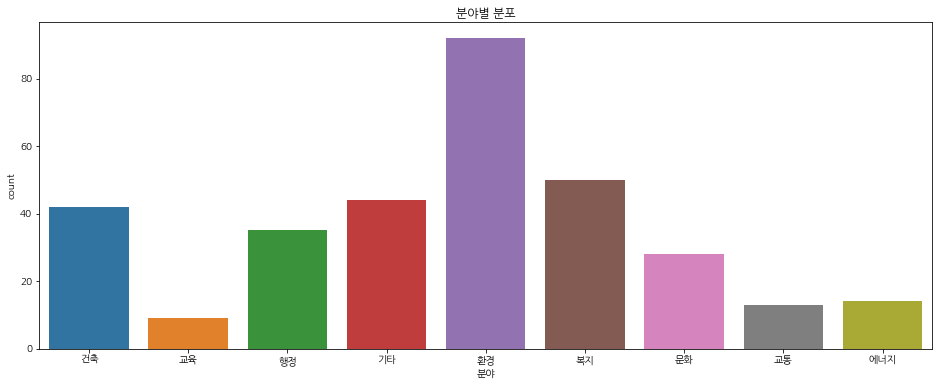

In [58]:
plt.figure(figsize=(16,6))
sns.countplot(data=df,x='분야').set(title='분야별 분포')

[Text(0.5, 1.0, '종료년도')]

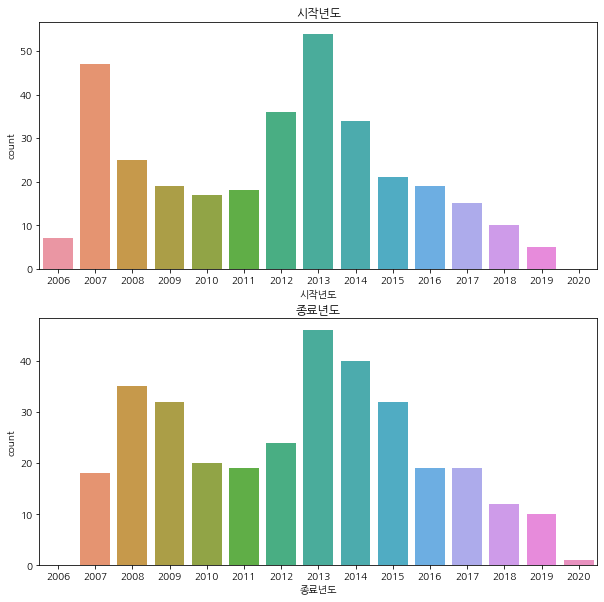

In [70]:
y_cols = [i for i in range(2006,2021)]
ig,axes = plt.subplots(2,1,figsize=(10,10))
sns.countplot(data=df,x='시작년도',ax=axes[0],order=y_cols).set(title='시작년도')
sns.countplot(data=df,x='종료년도',ax=axes[1],order=y_cols).set(title='종료년도')

[Text(0.5, 1.0, '종료월')]

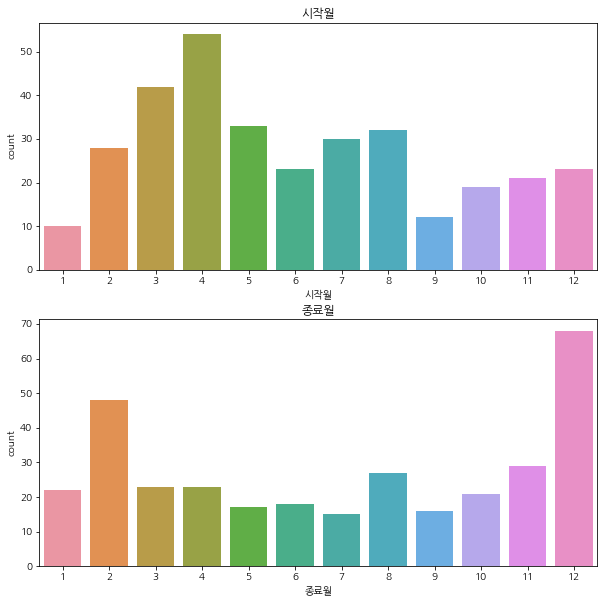

In [71]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
sns.countplot(data=df,x='시작월',ax=axes[0]).set(title='시작월')
sns.countplot(data=df,x='종료월',ax=axes[1]).set(title='종료월')

[Text(0.5, 1.0, '기간 분포(월)')]

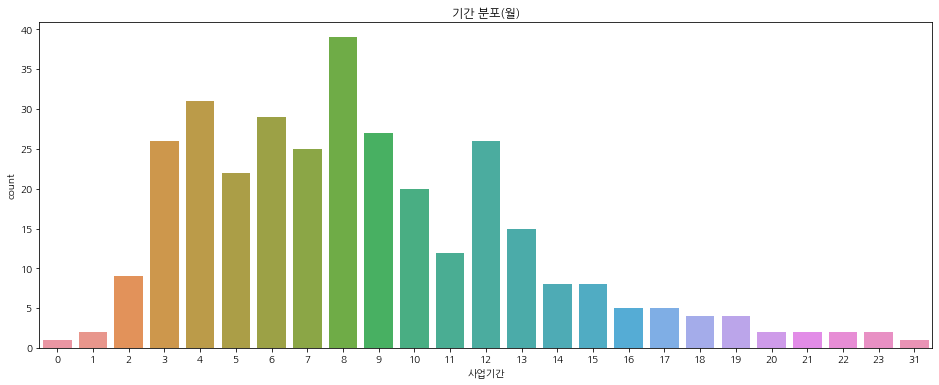

In [60]:
plt.figure(figsize=(16,6))
sns.countplot(data=df,x='사업기간').set(title='기간 분포(월)')

[Text(0.5, 1.0, '분야별 평균 사업 기간')]

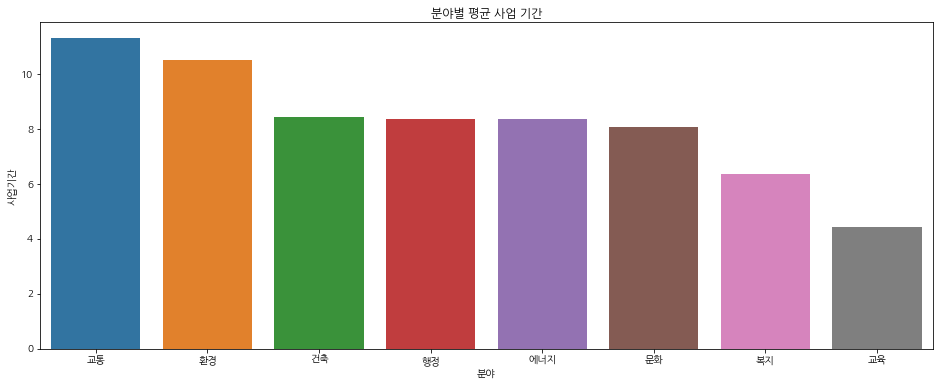

In [73]:
sub_df = df[df['분야']!='기타'].groupby(['분야'],as_index=False)['사업기간'].mean().sort_values('사업기간',ascending=False)
plt.figure(figsize=(16,6))
sns.barplot(data=sub_df,x='분야',y='사업기간').set(title='분야별 평균 사업 기간')

## 분석 결과

**분야별 분포는?**

- 환경,복지,건축,행정,문화 순으로 많다

**시작년도,시작월,종료년도,종료월 분포는?**

- 2007년과 2012-2014년도에 시작한 사업이 많고, 2008-2009년과 2013-2015년도에 종료한 사업이 많다.

- 3-4월,7-8월,11-12월에 주로 시작하고 2월,12월에 주로 종료된다.

**사업기간 분포는?**

- 사업 기간은 주로 3개월-12개월에 분포하고 있다.

**분야별 평균 사업기간은?**

- 교통,환경,건축 등이 사업 기간이 오래 걸리고 복지,교육 등이 비교적 짧게 걸린다.

## 분석 결과에 대한 생각

- 사업 시작월과 종료월의 분포를 보았을 때, 특정 시기에 학술용역에 대한 수요가 집중된다고 볼 수 있다.

- 사업기간과 종료월의 분포를 보았을 때,프로젝트를 당해까지 마감하려는 선호도 혹은 필요성이 있다고 볼 수 있다.

- 분야에 따라 평균적인 사업기간이 상이한 점을 고려하여 용역 계획을 잘 설정할 필요가 있다.